In [1]:
from matplotlib import pyplot

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2

from src.segment import egg_contours
from src.load import load_image

# If we are using PyCharm dark mode, the image will be inverted unless we do this
pyplot.style.use('dark_background')

- Use Pandas to load the CSV that contains our URLs for each images
- The only information we need right now is the URL of image, so we grab that column
- Use our helper function to get the image from URL and open a CV2 representation of this

In [46]:
data = pd.read_csv('./data/California_Egg_Data.csv')

In [47]:
data.dtypes

IMAGE                             object
IMAGE URL                         object
GUID                              object
SCIENTIFIC_NAME                   object
COUNTRY                           object
STATE_PROV                        object
SPEC_LOCALITY                     object
VERBATIM_DATE                     object
DEC_LAT                          float64
DEC_LONG                         float64
COORDINATEUNCERTAINTYINMETERS    float64
dtype: object

In [48]:
stats = dict()

In [49]:
for idx, row in data.iterrows():
    if row["SCIENTIFIC_NAME"] not in stats:
        stats[row["SCIENTIFIC_NAME"]] = []

    img = load_image(row["IMAGE URL"])

    contour_list = egg_contours(img)
    stats[row["SCIENTIFIC_NAME"]].append(len(contour_list))

In [54]:
# Only run this if you want to save the data from above
# import json
# with open('stats.json', 'w') as fp:
#     json.dump(stats, fp)

In [8]:
averages = []
lengths = []

In [9]:
for key in stats:
    averages.append(np.average(stats[key]))
    lengths.append(len(stats[key]))

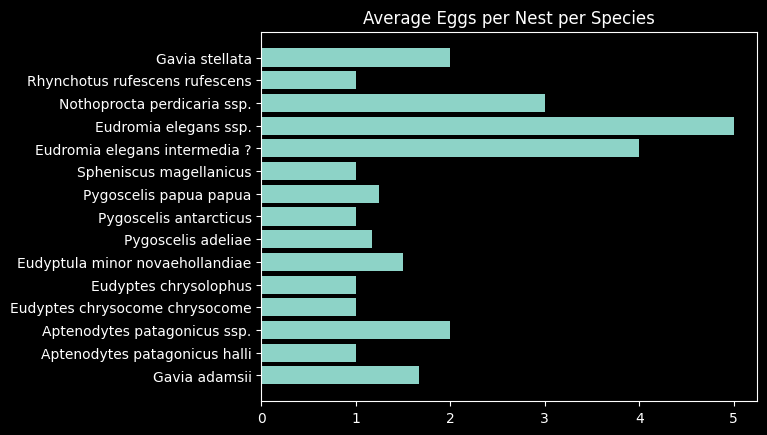

In [11]:
plt.barh(list(stats.keys())[10:25], averages[10:25])
plt.figure(1, [5, 20]) # this line moved and figure size changed to suit data
plt.tick_params(axis='both', which='minor', labelsize=1)
plt.title("Average Eggs per Nest per Species")
plt.show()

In [2]:
import json

In [5]:
with open('./data/stats.json', 'r') as fp:
    stats = json.load(fp)

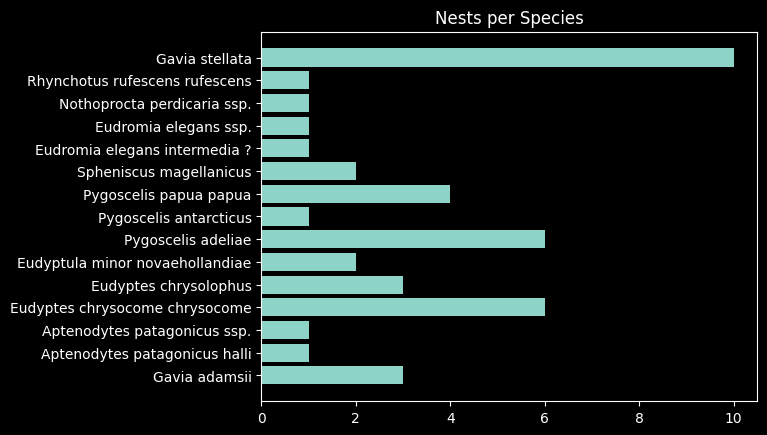

In [12]:
plt.barh(list(stats.keys())[10:25], lengths[10:25])
plt.figure(1, [5, 20]) # this line moved and figure size changed to suit data
plt.tick_params(axis='both', which='minor', labelsize=1)
plt.title("Nests per Species")
plt.show()